In [ ]:
!pip install qiskit qiskit-nature[pyscf] pylatexenc -U --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [39]:
!pip install qiskit_ibm_runtime -U --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.9/248.9 KB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip show qiskit_nature 
!pip show pyscf

Name: qiskit-nature
Version: 0.5.2
Summary: Qiskit Nature: A library of quantum computing chemistry/physics experiments
Home-page: https://github.com/Qiskit/qiskit-nature
Author: Qiskit Nature Development Team
Author-email: hello@qiskit.org
License: Apache-2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: h5py, numpy, psutil, qiskit-terra, rustworkx, scikit-learn, scipy, setuptools, typing-extensions
Required-by: 
Name: pyscf
Version: 2.1.1
Summary: PySCF: Python-based Simulations of Chemistry Framework
Home-page: http://www.pyscf.org
Author: Qiming Sun
Author-email: osirpt.sun@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: h5py, numpy, scipy
Required-by: 


In [59]:
# Import necessary libraries and packages
import math
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from qiskit import Aer, IBMQ, QuantumCircuit
#from qiskit.primitives import Estimator
from qiskit.providers.aer import StatevectorSimulator
from qiskit.utils import QuantumInstance, algorithm_globals

from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Import Qiskit libraries for VQE
from qiskit.algorithms import MinimumEigensolverResult, VQE
from qiskit.algorithms.optimizers import SLSQP, SPSA, L_BFGS_B, GradientDescent
from qiskit.circuit.library import TwoLocal, EfficientSU2

# Import Qiskit Nature libraries
from qiskit_nature.algorithms import GroundStateEigensolver, VQEUCCFactory
from qiskit_nature.algorithms.ground_state_solvers.minimum_eigensolver_factories import NumPyMinimumEigensolverFactory
from qiskit_nature.circuit.library import UCC, UCCSD
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import BravyiKitaevMapper, JordanWignerMapper, ParityMapper
from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem
from qiskit_nature.transformers.second_quantization.electronic import ActiveSpaceTransformer, FreezeCoreTransformer

from qiskit_ibm_runtime import Estimator, Session, QiskitRuntimeService, Options

from qiskit_aer.noise import NoiseModel

# Prototype-zne
!pip install prototype-zne --quiet

from qiskit_nature.settings import settings

settings.dict_aux_operators = True

In [ ]:
from qiskit.primitives import Estimator, BackendEstimator

In [ ]:
def construct_problem(geometry, charge, multiplicity, basis, num_electrons, num_molecular_orbitals):

    molecule = Molecule(geometry=geometry,
                            charge=charge, 
                            multiplicity=multiplicity) # This is an example for LiH with bond distance of 2.5 Angstroms, neutral charge, spin multiplicity of 1
    driver = ElectronicStructureMoleculeDriver(molecule, basis=basis, driver_type=ElectronicStructureDriverType.PYSCF) # This is an example of using STO-3G basis set, and performing preliminary Quantum Chemistry calculation using PySCF

    # Run the preliminary quantum chemistry calculation
    properties = driver.run()

    # Freezing lowest electron orbitals and removing inactive orbitals (found experimentally based on Kandala et al.)
    freezeCoreTransformer = FreezeCoreTransformer(True,remove_orbitals=[3,4])

    # Now you can get the reduced electronic structure problem
    problem_reduced = ElectronicStructureProblem(driver, transformers=[freezeCoreTransformer])

    # The second quantized Hamiltonian of the reduce problem
    second_q_ops_reduced = problem_reduced.second_q_ops()

    # Set the mapper to qubits
    parity_mapper = ParityMapper() # This is the example of parity mapping

    # Set the qubit converter with two qubit reduction to reduce the computational cost 
    parity_converter = QubitConverter(parity_mapper, two_qubit_reduction=True)

    # Compute the Hamitonian in qubit form
    qubit_op_parity = parity_converter.convert(second_q_ops_reduced.get('ElectronicEnergy'), num_particles=problem_reduced.num_particles)
   
    # Get reference solution
    vqe_factory = VQEUCCFactory(quantum_instance=Aer.get_backend("aer_simulator_statevector"),optimizer=SLSQP(maxiter=50),
                                ansatz=UCC(excitations='sd')
                                ) # This is an example of UCC"SD" ansatz
    solver = GroundStateEigensolver(parity_converter, vqe_factory)    
    real_solution = solver.solve(problem_reduced).total_energies[0]    
    
    ansatz=vqe_factory.ansatz
    
    return ansatz, qubit_op_parity, real_solution, problem_reduced

In [ ]:
def custom_vqe(estimator, ansatz, ops, problem_reduced, optimizer = None, initial_point=None, maxiter=100):

    # Define convergence list
    convergence = []

    # Keep track of jobs (Do-not-modify)
    job_list = []

    # Define evaluate_expectation function
    def evaluate_expectation(x):
        x = list(x)

        # Define estimator run parameters
        job = estimator.run(circuits=[ansatz], observables=[ops], parameter_values=[x]).result() # ----------- Enter your code here
        results = job.values[0]
        job_list.append(job)

        # Pass results back to callback function
        return np.real(results)

    # Call back function
    def callback(x,fx,ax,tx,nx): # GradientDescent, no nx
        # Callback function to get a view on internal states and statistics of the optimizer for visualization
        convergence.append(evaluate_expectation(fx))
        #clear_output(True)
        #print("Iteration #: ", optimizer._nfev)

    np.random.seed(10)

    # Define initial point. We shall define a random point here based on the number of parameters in our ansatz
    if initial_point is None:
        initial_point = np.random.random(ansatz.num_parameters)

    # Define optimizer and pass callback function
    if optimizer == None:
        #optimizer = GradientDescent(learning_rate=0.9, maxiter=maxiter, callback=callback)
        optimizer = SPSA(maxiter=maxiter, callback=callback)
        #optimizer = L_BFGS_B(maxiter=maxiter)

    # Define minimize function
    result =  optimizer.minimize(evaluate_expectation, x0=initial_point)# ----------- Enter your code here

    vqe_interpret = []
    for i in range(len(convergence)):
        sol = MinimumEigensolverResult()
        sol.eigenvalue = convergence[i]
        sol = problem_reduced.interpret(sol).total_energies[0]
        vqe_interpret.append(sol)

    return vqe_interpret, job_list, result

In [ ]:
import matplotlib.pyplot as plt

def plot_graph(energy, real_solution, molecule, color="tab:blue"):
    
    plt.rcParams["font.size"] = 14

    # plot loss and reference value
    plt.figure(figsize=(12, 6), facecolor='white')
    plt.plot(energy, label="Estimator VQE {}".format(molecule),color = color)
    plt.axhline(y=real_solution.real, color="tab:red", ls="--", label="Target")

    plt.legend(loc="best")
    plt.xlabel("Iteration")
    plt.ylabel("Energy [H]")
    plt.title("VQE energy")
    plt.show()

In [ ]:
# Constructing BeH2
distance = 1.7
beh2 = [["Be", [ 0.0,    0.0,    0.0]], 
        ["H", [ 0.0,    0.0,   -distance]],
        ["H", [ 0.0,    0.0,   distance]]]

In [ ]:
from qiskit_aer.primitives import Estimator as Aer_Estimator
from IPython.display import clear_output

In [ ]:
algorithm_globals.random_seed = 1024
# For H2
ansatz_m, ops_m, real_solution_m, problem_reduced_m = construct_problem(geometry=beh2, charge=0, multiplicity=1, basis="sto3g", num_electrons=6, num_molecular_orbitals=7)

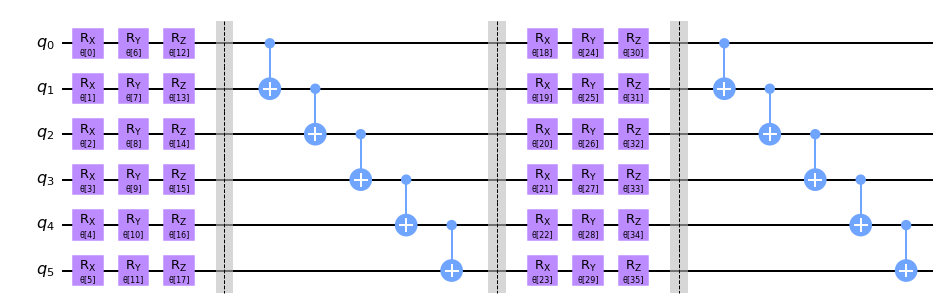

In [ ]:
# To be removed
qcac = QuantumCircuit(6)
qcac.cx(0,1)
qcac.cx(1,2)
qcac.cx(2,3)
qcac.cx(3,4)
qcac.cx(4,5)
#qcac.cx(5,0)

custom_ansatz = TwoLocal(num_qubits=6, rotation_blocks=['rx','ry','rz'], entanglement_blocks=qcac, reps=2, insert_barriers=True, skip_final_rotation_layer=True)
display(custom_ansatz.decompose().draw('mpl'))

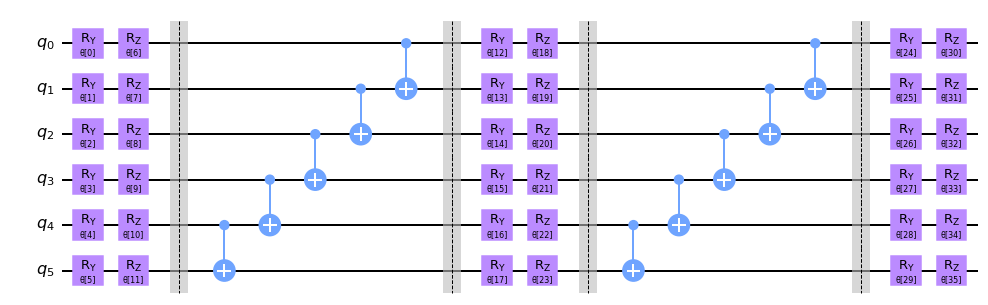

In [ ]:
# To be removed
custom_ansatz = EfficientSU2(num_qubits=6, reps=2, insert_barriers=True, skip_final_rotation_layer=False)
display(custom_ansatz.decompose().draw('mpl', fold=300))

### Hardware efficient ansatz

Circuit depth: 6


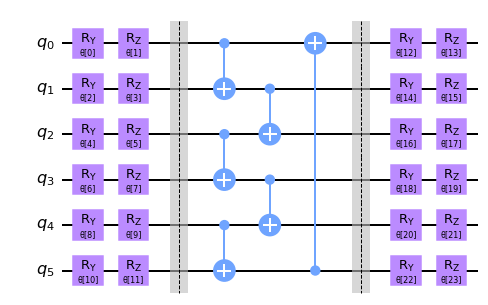

In [47]:
from qiskit.circuit import ParameterVector

# number of qubits
n_qubit = 6

# number of layers
depth = 1
custom_ansatz = QuantumCircuit(n_qubit)
theta = ParameterVector('θ', n_qubit*depth*4)# rx +6)

for d in range(depth):
  for i in range(n_qubit):
    custom_ansatz.ry(theta[2*i+2*n_qubit*d], i)
    custom_ansatz.rz(theta[2*i+1+2*n_qubit*d], i)
  custom_ansatz.barrier()
  for i in range(n_qubit//2):
    custom_ansatz.cx(2*i, 2*i+1)
  for i in range(n_qubit//2-1):
    custom_ansatz.cx(2*i+1, 2*i+2)
  custom_ansatz.cx(5, 0)
  custom_ansatz.barrier()
  for i in range(n_qubit):
    custom_ansatz.ry(theta[2*i+2*n_qubit*depth], i)
    custom_ansatz.rz(theta[2*i+1+2*n_qubit*depth], i)
    #if d == 0:
    #  custom_ansatz.rx(theta[2*i+1+2*n_qubit*depth], i)

print("Circuit depth:", custom_ansatz.depth())
custom_ansatz.draw('mpl')

Initial tests of `custom_vqe` function

Relative error: 0.2288 %  =  0.03552431292684233 Ha


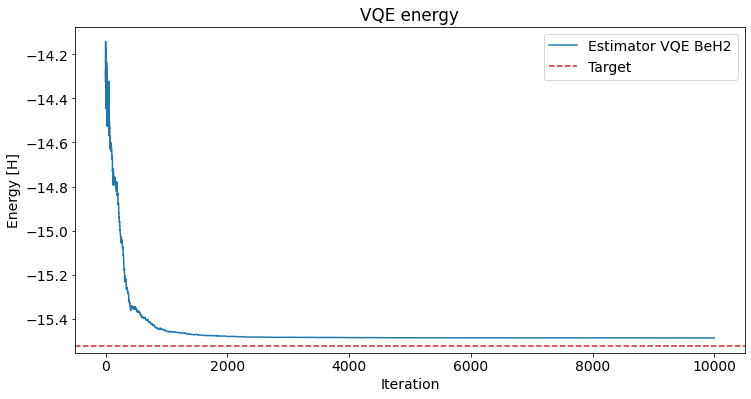

{   'fun': -3.448842956636626,
    'jac': None,
    'nfev': 30000,
    'nit': 10000,
    'njev': None,
    'x': array([ 0.06165499, -3.19050494, -2.99695805,  5.79222217,  0.57743403,
        2.44185679,  1.57039648,  3.43069677,  0.12296889, -2.6662938 ,
        1.36438171,  1.53598398,  3.12410395,  3.90197902,  0.98630903,
       -1.65874601,  1.60463269, -2.73923415,  2.90391853, -2.20615717,
        0.53835142, -0.59729847,  0.19724036, -1.44690006, -0.00782846,
        0.73637383,  0.03487755,  1.67571891, -0.07926826,  3.69565155,
       -1.13738872,  1.57255657, -0.91565136,  2.52154699,  1.70965856,
        3.17971069, -0.00857254,  0.707236  ,  2.7269776 , -0.52387435,
       -3.52206559,  1.30968498,  5.48991474,  1.61111631, -0.25601224,
       -1.3510409 ,  1.60036758,  3.14736576,  0.01261712, -0.61236761,
        0.9653584 ,  1.79503063, -2.17670339,  3.80964909, -4.67743734,
        3.1904511 , -0.94258728, -3.33592596,  1.57240049,  3.28036293])}
CPU times: user 7min 5

In [ ]:
%%time
estimator = Aer_Estimator([custom_ansatz], [ops_m.primitive], backend_options={'method':'statevector'}, run_options={'shots':None}, approximation=True)

# Estimator VQE for BeH2
initial_point = np.ones(custom_ansatz.num_parameters) * np.pi/4
Energy_BeH2_m,_,results = custom_vqe(estimator=estimator, ansatz=custom_ansatz, ops=ops_m,problem_reduced=problem_reduced_m, maxiter=10000, initial_point=initial_point)

# Plot Graph BeH2
print("Relative error:", np.round(np.abs((Energy_BeH2_m[-1].real-real_solution_m)/real_solution_m*100),4), "%", " = ", np.abs(Energy_BeH2_m[-1].real-real_solution_m), "Ha")
plot_graph(Energy_BeH2_m, real_solution_m, "BeH2")
print(results)

## Bartosz Experimentation

In [ ]:
from qiskit.algorithms import MinimumEigensolver, VQEResult, MinimumEigensolverResult
from IPython.display import clear_output

# Define a custome VQE class to orchestra the ansatz, classical optimizers, 
# initial point, callback, and final result
class CustomVQE(MinimumEigensolver):

    def __init__(self, estimator, circuit, optimizer, problem=None, callback=None, aux_operators=None):#, initial_point=None):
        self._estimator = estimator
        self._circuit = circuit
        self._optimizer = optimizer
        self._problem = problem
        self._callback = callback
        #self._initial_point = initial_point
        self.params_history = []
        
    def compute_minimum_eigenvalue(self, operators, initial_point=None):

        # Define objective function to classically minimize over
        def objective(x):
            # Execute job with estimator primitive
            x = list(x)
            job = self._estimator.run([self._circuit], [operators], [x])
            #display("job: {}".format(job.job_id()))
            # ---
            self.params_history.append(x)
            # ---
            # Get results from jobs
            est_result = job.result()
            # Get the measured energy value
            value = est_result.values[0]
            
            sol = MinimumEigensolverResult()
            sol.eigenvalue = value
            sol = self._problem.interpret(sol).total_energies[0]

            # Save result information using callback function
            if self._callback is not None:
                self._callback(np.real(sol), len(self.params_history))
            return np.real(sol)

        # Select an initial point for the ansatzs' parameters
        #x0 = np.pi/4 * np.random.rand(self._circuit.num_parameters)
        #x0 = [np.pi/4] * self._circuit.num_parameters
        
        if initial_point is None:
            initial_point = [np.pi/4] * self._circuit.num_parameters # np.random.rand(self._circuit.num_parameters)
        
        #print(self._initial_point)
        # TODO: Initial point as parameter
        res = self._optimizer.minimize(objective, x0=initial_point)#, bounds=[-18.5,-16])#self._initial_point)

        # Populate VQE result
        result = VQEResult()
        result.cost_function_evals = res.nfev
        result.eigenvalue = res.fun
        result.optimal_value = res.fun
        result.optimal_parameters = res.x

        return result, self.params_history

In [ ]:
from qiskit.primitives import BackendEstimator
from qiskit.providers.fake_provider import FakeManilaV2, FakeAthensV2, FakeAthens, FakeLagos

Relative error: 0.8941 %  =  0.13879323942153832 Ha


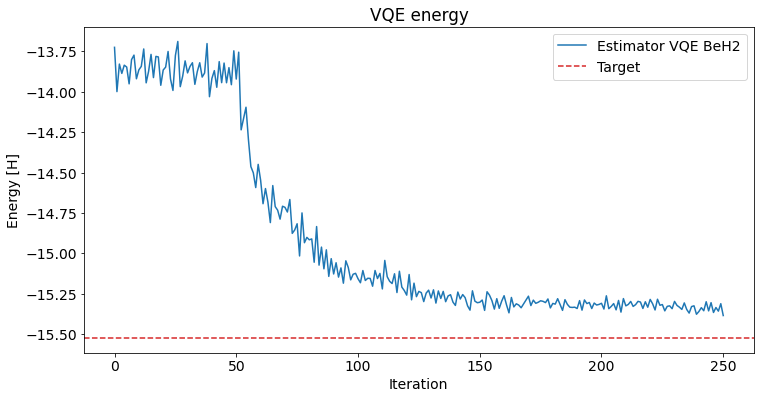

Optimal parameters: [ 7.87211955e-02  1.02446255e+00  8.33637973e-02  1.12913890e+00
 -5.57167792e-03  1.00483278e+00  3.17109466e+00  2.84299393e+00
 -4.39682933e-02 -1.77977629e-01 -3.61874017e-02  1.59030042e+00
  3.14436832e+00  3.12679850e+00  1.67943782e-02  7.82274998e-02
  2.46528448e-03  3.39627397e+00  2.33444483e-02  1.48079693e+00
  3.23980556e+00  1.88346565e+00  1.65303898e-02  1.57570738e+00]
CPU times: user 9min 50s, sys: 29.6 s, total: 10min 20s
Wall time: 11min 9s


In [64]:
%%time
# VQE for BeH2
service = QiskitRuntimeService(channel="ibm_quantum", token="b13351454c9fcc2bb7293d061ebd32ae0cb3d911397e8a9c17ccf7d548b8f303cd37452869765191ac17d43dcc556bbb41bcf80c5d775222b2c1d04167df33db")
backend = "ibmq_qasm_simulator"
fake_backend = FakeLagos()
noise_model = NoiseModel.from_backend(fake_backend)

options = Options()
# options.simulator = {
#     "noise_model": noise_model,
#     "basis_gates": fake_backend.configuration().basis_gates,
#     "coupling_map": fake_backend.configuration().coupling_map,
#     "seed_simulator": 42
# }
# options.execution.shots = 1000
# options.optimization_level = 3 # No optimization
# options.resilience_level = 2 # ZNE

options = {"resilience_level": 2, "execution": {"shots": 1000}, "optimization_level": 0}

#x0 = result.optimal_parameters
with Session(service=service, backend=backend) as session:
  # Define instance of qiskit-terra's Estimator primitive
  #estimator = Aer_Estimator([custom_ansatz], [ops_m.primitive], backend_options={'method':'statevector'}, run_options={'shots':None}, approximation=True)
  estimator = BackendEstimator(backend=FakeLagos(), options=options)
  #estimator = Estimator(session=session, options=options)

  intermediate_info = []

  # Define a simple callback function returning interpreted eigenvalue
  def callback(value, iter_num):
          # Overwrites the same line when printing
          display("{}: Energy = {}".format(iter_num, value))
          clear_output(wait=True)
          intermediate_info.append(value)

  #optimizer = L_BFGS_B(maxfun=20000, ftol=2.220446049250313e-15)
  #optimizer = SLSQP(maxiter=100,ftol=2.220446049250313e-15)
  optimizer = SPSA(maxiter=100)

  initial_point = np.ones(custom_ansatz.num_parameters) * np.pi/4

  # Setup VQE algorithm
  custom_vqe = CustomVQE(estimator, custom_ansatz, optimizer, problem_reduced_m, callback=callback)

  # Run the custom VQE function and monitor execution time
  result, params_history = custom_vqe.compute_minimum_eigenvalue(ops_m.primitive, initial_point=initial_point)

# Plot Graph BeH2
print("Relative error:", np.round(np.abs((intermediate_info[-1].real-real_solution_m)/real_solution_m*100),4), "%", " = ", np.abs(intermediate_info[-1].real-real_solution_m), "Ha")
plot_graph(intermediate_info, real_solution_m, "BeH2")

print("Optimal parameters:", result.optimal_parameters)

In [36]:
x0 = result.optimal_parameters